In [1]:
from derivatives import *
import datetime as dt

In [2]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-dark')
%matplotlib inline

In [3]:
gbm_env = MarketEnvironment('GBE_ENV', dt.datetime(2020, 1, 1))

In [4]:
gbm_env.add_constant('initial_value', 36.)
gbm_env.add_constant('volatility', 0.2)
gbm_env.add_constant('final_date', dt.datetime(2020, 12, 31))
gbm_env.add_constant('currency', 'EUR')
gbm_env.add_constant('frequency', 'M')
gbm_env.add_constant('paths', 10000)

In [5]:
csr_model = ConstantShortRate('csr', 0.06)

In [6]:
gbm_env.add_curve('discount_curve', csr_model)

In [7]:
gbm_model = GeometricBrownianMotion('gbm', gbm_env)

In [8]:
gbm_model.generate_time_grid()

In [9]:
%time paths_1 = gbm_model.get_instrument_values()

CPU times: user 5.67 ms, sys: 0 ns, total: 5.67 ms
Wall time: 5.25 ms


In [10]:
paths_1.round(3)

array([[36.   , 36.   , 36.   , ..., 36.   , 36.   , 36.   ],
       [35.253, 35.194, 32.592, ..., 37.606, 35.108, 34.811],
       [34.041, 34.704, 31.615, ..., 35.041, 37.016, 35.225],
       ...,
       [34.957, 37.84 , 33.266, ..., 37.656, 36.332, 39.725],
       [36.089, 37.047, 33.85 , ..., 37.476, 41.3  , 39.87 ],
       [36.379, 38.41 , 34.646, ..., 37.798, 41.045, 37.94 ]])

In [11]:
gbm_model.update(volatility=0.5)

In [12]:
%time paths_2 = gbm_model.get_instrument_values()

CPU times: user 5.7 ms, sys: 447 µs, total: 6.15 ms
Wall time: 5.74 ms


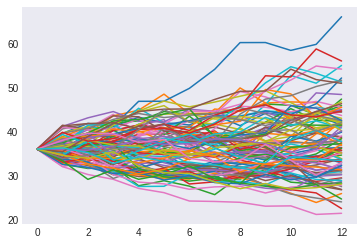

In [13]:
for path in paths_1.T[:100]:
    plt.plot(path)
plt.show()